# DATA SCIENCE INTERN @BHARAT INTERN

### AUTHOR : PARVEJ ALAM M. ANSARI

# TASK 1 : STOCK PREDICTION

## PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

## ABOUT DATASET
### Adani Enterprise Stock Prediction

This dataset contains historical data of **Adani Enterprise stock prices** and related attributes. It consists of 7 columns and a smaller subset of 745 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

The columns in the dataset are as follows:

1. **Symbol**: The name of the company, which is **Adani Enterprise (ADANIENT)** in this case.
2. **Date**: The year and date of the stock data.
3. **Close**: The closing price of ADANIENT's stock on a particular day.
4. **High**: The highest value reached by ADANIENT's stock on the given day.
5. **Low**: The lowest value reached by ADANIENT's stock on the given day.
6. **Open**: The opening value of ADANIENT's stock on the given day.
7. **Volume**: The trading volume of ADANIENT's stock on the given day, i.e., the number of shares traded.
8. **adjClose**: The adjusted closing price of ADANIENT's stock, considering factors such as dividends and stock splits.

The dataset is available at Kaggle : https://finance.yahoo.com/quote/ADANIENT.NS/history/

## STEPS INVOLVED : 
### 1 . IMPORTING LIBRARIES AND DATA TO BE USED
### 2. GATHERING INSIGHTS
### 3. DATA PRE-PROCESSING
### 4. CREATING LSTM MODEL
### 5. VISUALIZING ACTUAL VS PREDICTED DATA
### 6. PREDICTING UPCOMING 15 DAYS

## STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [2]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [51]:
df = pd.read_csv('Adani_Enterprise.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-07,181.050003,195.000000,180.100006,192.899994,192.497574,9386323
1,2020-08-10,192.899994,198.300003,192.350006,195.699997,195.291718,4627306
2,2020-08-11,196.000000,199.800003,194.399994,195.850006,195.441422,2965963
3,2020-08-12,195.800003,200.750000,190.199997,197.699997,197.287537,3352636
4,2020-08-13,198.899994,203.300003,197.750000,200.750000,200.331192,3552469
5,2020-08-14,202.399994,204.500000,191.449997,196.199997,195.790695,6617104
6,2020-08-17,197.399994,201.649994,196.050003,197.800003,197.387344,3227005
7,2020-08-18,200.000000,216.800003,199.000000,213.699997,213.254181,13367091
8,2020-08-19,214.250000,245.399994,214.250000,239.550003,239.050262,19592028
9,2020-08-20,241.199997,245.000000,230.399994,234.000000,233.511810,9484513


## STEP 2 : GATHERING INSIGHTS

In [52]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (745, 7)


In [53]:
# statistical description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,745.000000,745.000000,745.000000,745.000000,745.000000,7.450000e+02
mean,1813.924898,1848.396439,1774.906042,1812.004765,1809.769748,5.153096e+06
std,1010.166745,1021.323772,992.957041,1006.344539,1005.574004,5.956241e+06
min,181.050003,195.000000,180.100006,192.899994,192.497574,0.000000e+00
25%,1274.400024,1302.000000,1201.199951,1267.500000,1264.855713,1.672655e+06
50%,1714.000000,1744.099976,1683.000000,1715.500000,1713.057373,3.161306e+06
75%,2391.000000,2405.699951,2336.500000,2376.100098,2375.163330,5.978272e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,4161.137207,4.926454e+07


In [54]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       745 non-null    object 
 1   Open       745 non-null    float64
 2   High       745 non-null    float64
 3   Low        745 non-null    float64
 4   Close      745 non-null    float64
 5   Adj Close  745 non-null    float64
 6   Volume     745 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.9+ KB


In [55]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### There are no null values in the dataset

In [56]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,Open,Close
Date,,
2020-08-07,181.050003,192.899994
2020-08-10,192.899994,195.699997
2020-08-11,196.000000,195.850006
2020-08-12,195.800003,197.699997
2020-08-13,198.899994,200.750000
2020-08-14,202.399994,196.199997
2020-08-17,197.399994,197.800003
2020-08-18,200.000000,213.699997
2020-08-19,214.250000,239.550003


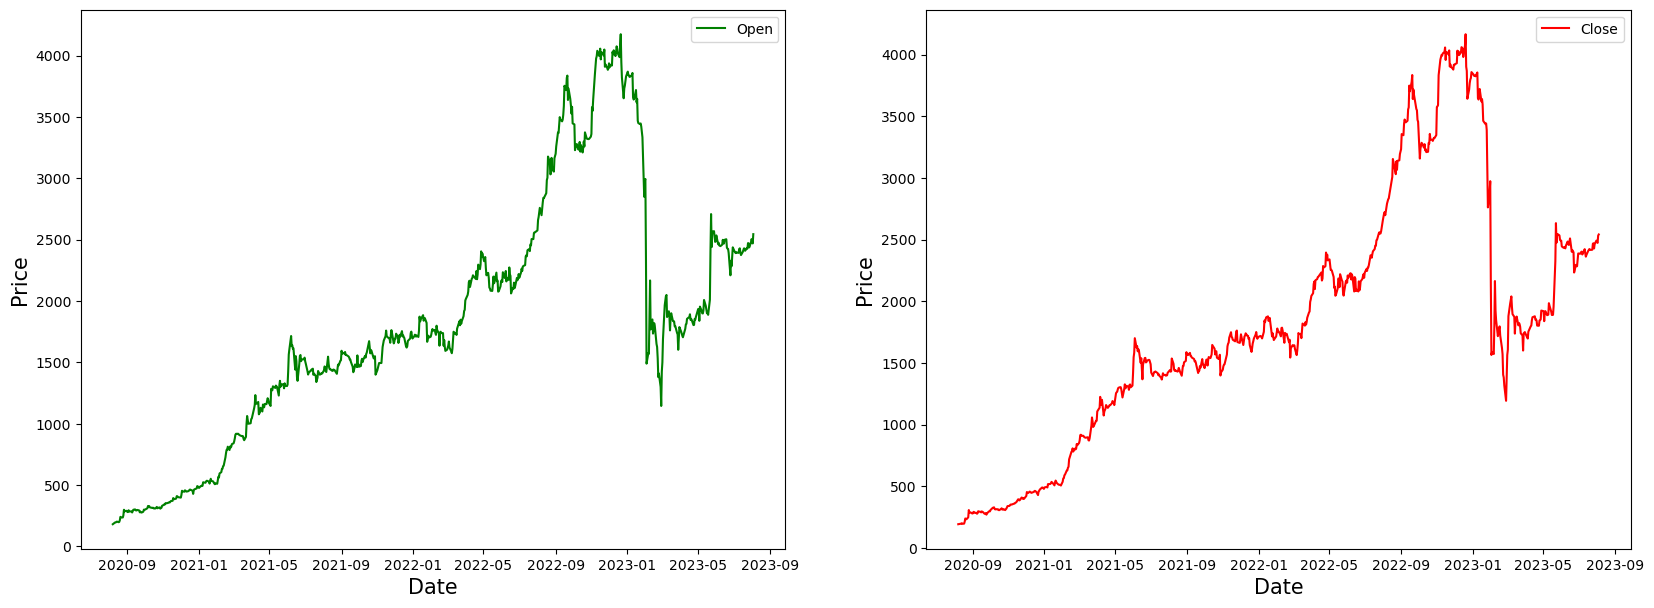

In [57]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

## STEP 3 : DATA PRE-PROCESSING

In [58]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2020-08-07,0.000000,0.000000
2020-08-10,0.002967,0.000705
2020-08-11,0.003743,0.000743
2020-08-12,0.003693,0.001208
2020-08-13,0.004469,0.001976
2020-08-14,0.005346,0.000831
2020-08-17,0.004094,0.001234
2020-08-18,0.004745,0.005236
2020-08-19,0.008313,0.011744


In [59]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

559

In [60]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((559, 2), (186, 2))

In [61]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [62]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((509, 50, 2), (509, 2), (136, 50, 2), (136, 2))

## STEP 4 :  CREATING LSTM MODEL

In [70]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_3 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [71]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
16/16 [==============================] - 6s 129ms/step - loss: 0.0326 - mean_absolute_error: 0.1310 - val_loss: 0.0076 - val_mean_absolute_error: 0.0685
Epoch 2/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0039 - mean_absolute_error: 0.0473 - val_loss: 0.0143 - val_mean_absolute_error: 0.0850
Epoch 3/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0014 - mean_absolute_error: 0.0288 - val_loss: 0.0114 - val_mean_absolute_error: 0.0650
Epoch 4/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0011 - mean_absolute_error: 0.0247 - val_loss: 0.0118 - val_mean_absolute_error: 0.0648
Epoch 5/100
16/16 [==============================] - 1s 58ms/step - loss: 9.5396e-04 - mean_absolute_error: 0.0228 - val_loss: 0.0106 - val_mean_absolute_error: 0.0592
Epoch 6/100
16/16 [==============================] - 1s 60ms/step - loss: 8.5163e-04 - mean_absolute_error: 0.0213 - val_loss: 0.0103 - val_mean_absolute_error: 0.0581
Epoch 7

16/16 [==============================] - 1s 61ms/step - loss: 3.2259e-04 - mean_absolute_error: 0.0130 - val_loss: 0.0034 - val_mean_absolute_error: 0.0351
Epoch 98/100
16/16 [==============================] - 1s 56ms/step - loss: 3.4360e-04 - mean_absolute_error: 0.0136 - val_loss: 0.0032 - val_mean_absolute_error: 0.0350
Epoch 99/100
16/16 [==============================] - 1s 58ms/step - loss: 3.4538e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0029 - val_mean_absolute_error: 0.0295
Epoch 100/100
16/16 [==============================] - 1s 59ms/step - loss: 3.3445e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0028 - val_mean_absolute_error: 0.0289


In [72]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

5/5 [==============================] - 1s 14ms/step


array([[0.8630285 , 0.8507542 ],
       [0.85921836, 0.8472034 ],
       [0.85652006, 0.8446953 ],
       [0.8468166 , 0.8344981 ],
       [0.8357445 , 0.8231263 ]], dtype=float32)

In [73]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[3627.9429, 3572.4358],
       [3612.725 , 3558.3306],
       [3601.9482, 3548.3677],
       [3563.193 , 3507.86  ],
       [3518.9717, 3462.6868]], dtype=float32)

## STEP 5 :  VISUALIZING ACTUAL VS PREDICTED DATA

In [74]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-136:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-136:].index)], axis=1)

In [75]:
# Inversing normalization/scaling 
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2023-01-17,3620.000000,3639.350098,3627.942871,3572.435791
2023-01-18,3648.000000,3596.699951,3612.725098,3558.330566
2023-01-19,3470.000000,3463.550049,3601.948242,3548.367676
2023-01-20,3450.000000,3456.149902,3563.193115,3507.860107
2023-01-23,3443.050049,3436.350098,3518.971680,3462.686768


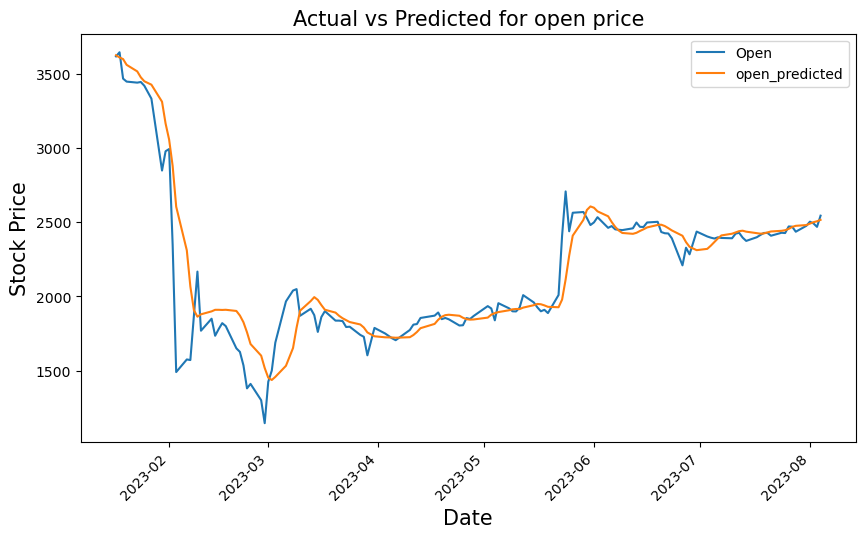

In [76]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

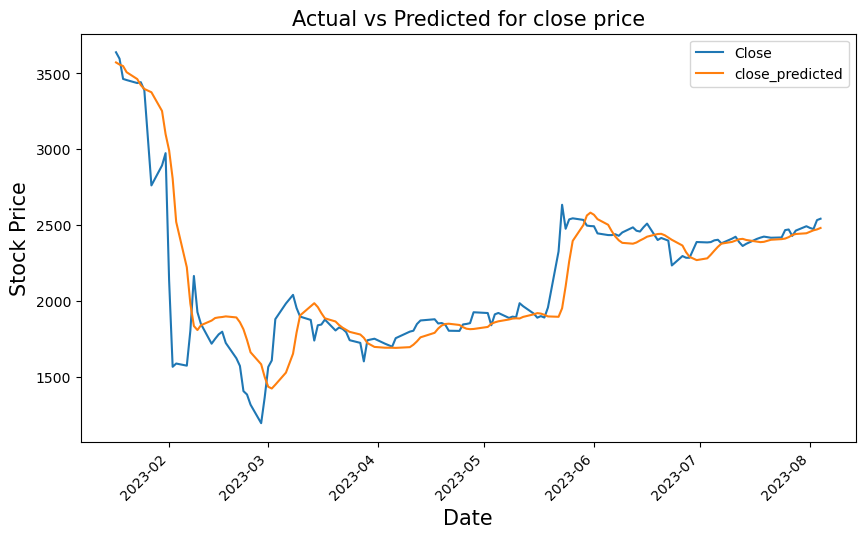

In [77]:
# plotting the actual close and predicted close prices on date index 
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

## STEP 6. PREDICTING UPCOMING 10 DAYS

In [78]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2023-08-01':'2023-08-10']

,Open,Close,open_predicted,close_predicted
2023-08-01,2504.850098,2481.100098,2491.316895,2455.343750
2023-08-02,2493.000000,2473.550049,2501.250977,2465.250000
2023-08-03,2469.899902,2532.600098,2507.549072,2471.154053
2023-08-04,2545.300049,2541.800049,2517.039307,2480.793213
2023-08-05,NaN,NaN,NaN,NaN
2023-08-06,NaN,NaN,NaN,NaN
2023-08-07,NaN,NaN,NaN,NaN
2023-08-08,NaN,NaN,NaN,NaN
2023-08-09,NaN,NaN,NaN,NaN
2023-08-10,NaN,NaN,NaN,NaN


In [79]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [80]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 23ms/step


In [81]:
# inversing Normalization/scaling
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

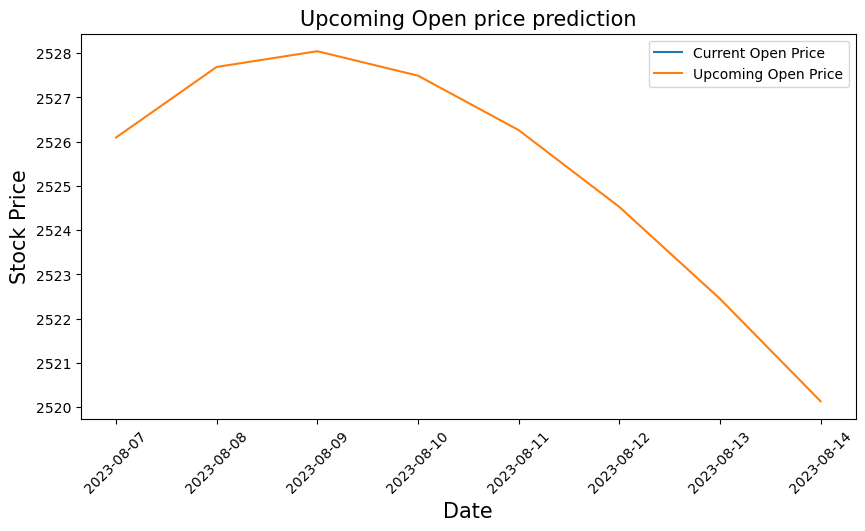

In [84]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-08-07':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-08-07':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

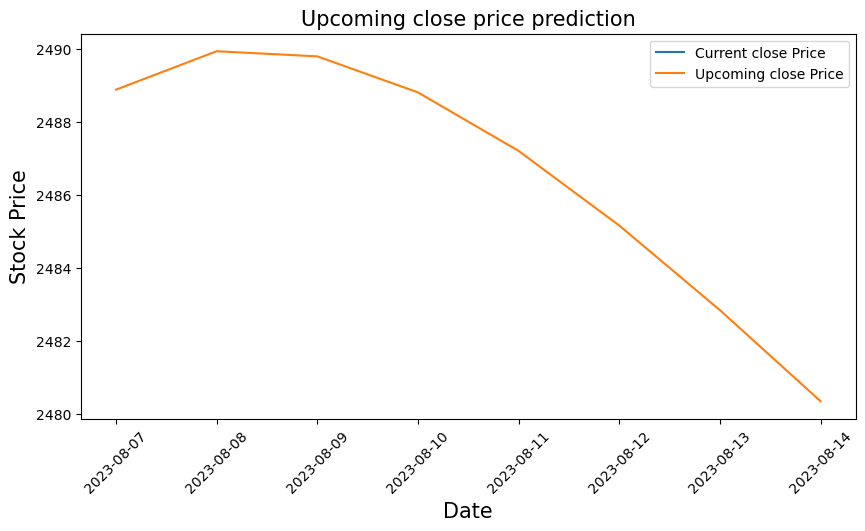

In [85]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-08-07':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2023-08-07':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

# THANK YOU!